In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('BC1 DBM2.csv')
dataset.head()

,GRADATION,AGG SOURCE,BINDER,DAG,AV,CT avg
0,19.0,17,822,5.58,7.243,47.675
1,19.0,17,822,5.58,5.982,50.025
2,19.0,17,822,5.58,4.003,41.935
3,19.0,17,822,5.58,3.449,34.315
4,19.0,17,822,5.58,3.262,37.280


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRADATION   300 non-null    float64
 1   AGG SOURCE  300 non-null    int64  
 2   BINDER      300 non-null    int64  
 3   DAG         300 non-null    float64
 4   AV          300 non-null    float64
 5   CT avg      300 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 14.2 KB


In [4]:
X = dataset.iloc[:, 0:5]
y = dataset.iloc[:,-1].values
X0= dataset.iloc[:,0]
X1= dataset.iloc[:,1]
X2= dataset.iloc[:,2]
X3= dataset.iloc[:,3]


In [5]:
X

,GRADATION,AGG SOURCE,BINDER,DAG,AV
0,19.0,17,822,5.58,7.243
1,19.0,17,822,5.58,5.982
2,19.0,17,822,5.58,4.003
3,19.0,17,822,5.58,3.449
4,19.0,17,822,5.58,3.262
...,...,...,...,...,...
295,26.5,24,3321,5.82,7.038
296,26.5,24,3321,5.82,5.464
297,26.5,24,3321,5.82,4.009
298,26.5,24,3321,5.82,3.529


In [6]:
y

array([ 47.675,  50.025,  41.935,  34.315,  37.28 ,  56.255,  49.82 ,
        51.775,  44.42 ,  33.23 ,  37.385,  32.345,  21.235,  28.23 ,
        16.515,  44.525,  38.275,  34.875,  28.185,  18.91 ,  72.345,
        62.05 ,  57.225,  48.685,  41.195,  64.78 ,  54.385,  51.63 ,
        41.58 ,  44.82 ,  82.77 ,  64.695,  67.925,  51.99 ,  33.645,
        51.98 ,  41.85 ,  38.36 ,  29.375,  21.175,  47.985,  46.68 ,
        42.34 ,  34.33 ,  26.305,  73.84 ,  81.74 ,  71.765,  56.72 ,
        55.57 , 101.945,  88.695,  91.085,  71.315,  68.145, 107.63 ,
       107.445,  96.89 ,  87.53 ,  75.95 ,  84.32 ,  69.98 ,  64.885,
        59.37 ,  55.08 ,  82.76 ,  78.675,  78.155,  53.93 ,  58.71 ,
       127.53 , 104.525, 111.55 ,  98.155,  81.27 ,  34.07 ,  41.04 ,
        24.845,  23.48 ,  20.98 ,  45.175,  33.315,  29.345,  26.63 ,
        28.43 ,  31.085,  24.375,  19.26 ,  16.485,  13.175,  25.48 ,
        27.52 ,  29.84 ,  18.675,  15.5  ,  41.145,  39.38 ,  35.375,
        31.74 ,  18.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
X_train

,GRADATION,AGG SOURCE,BINDER,DAG,AV
134,19.0,24,3321,6.48,2.942
145,19.0,24,3321,6.50,7.140
63,19.0,17,3321,5.05,3.791
293,26.5,24,3321,4.75,3.520
285,26.5,24,3321,4.71,7.056
...,...,...,...,...,...
251,26.5,24,1415,5.27,5.341
192,26.5,17,1415,4.90,4.121
117,19.0,24,1415,5.32,4.064
47,19.0,17,1415,6.23,4.224


In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor(min_samples_split=4, n_estimators=500, random_state=5)

regressor.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=500, random_state=5)

In [10]:
folds  = 5
score_calc = 'neg_mean_squared_error'

In [11]:
def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score)    
    print(grid.best_params_)
    print(grid.best_estimator_)
    
    return best_score

In [12]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7721292744200564

In [14]:
regressor.predict([[19, 17.  , 389.  ,   5.37,  35.  ]]) 

c:\Users\hp\Desktop\ug Model\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([43.63])

In [15]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_split' : [3,4,6,10,20], 'n_estimators' : [70,500], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_rf.fit(X_train, y_train)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(X_test)

8.670747696807389
{'min_samples_split': 3, 'n_estimators': 500, 'random_state': 5}
RandomForestRegressor(min_samples_split=3, n_estimators=500, random_state=5)


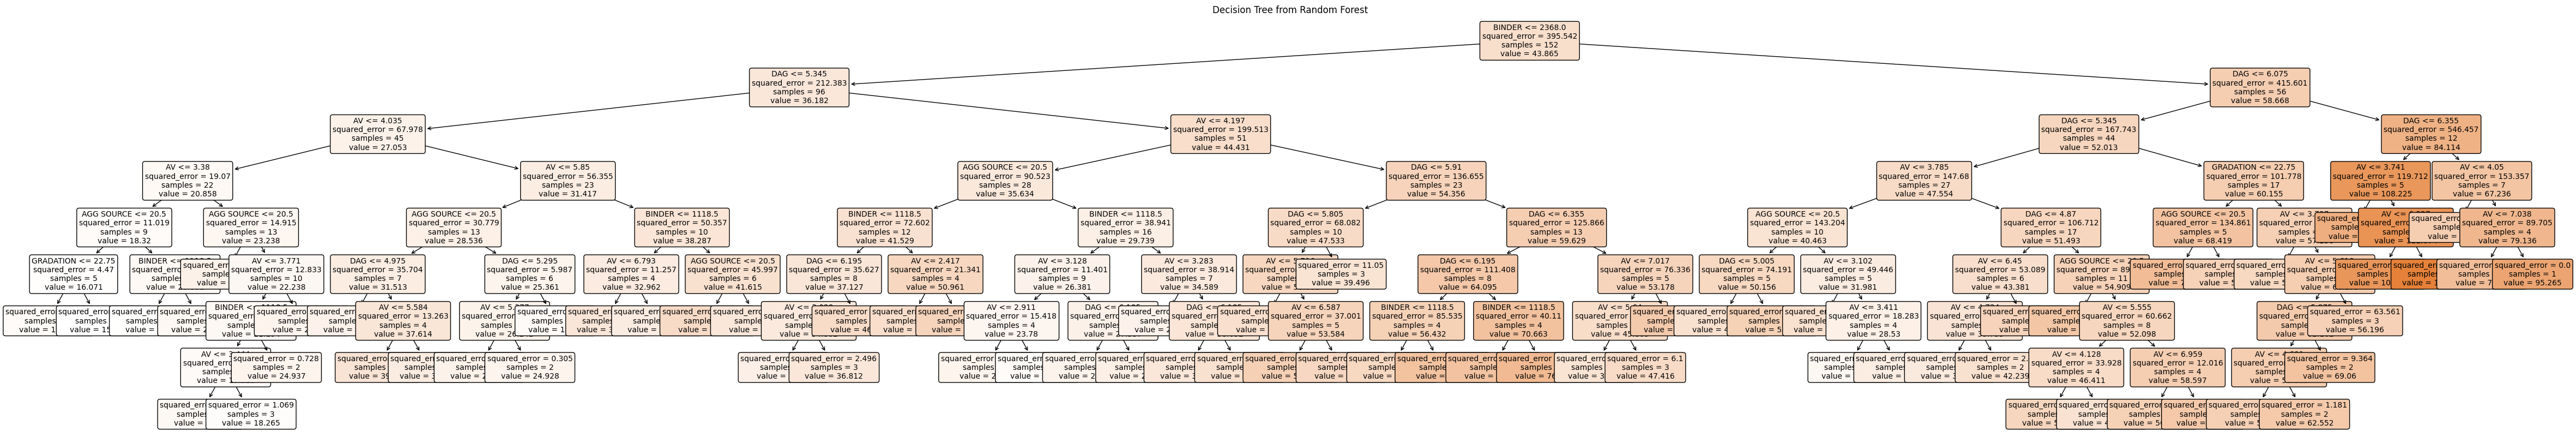

In [16]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_to_plot = regressor.estimators_[40]

plt.figure(figsize=(60, 10))
plot_tree(tree_to_plot, feature_names=dataset.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [17]:
import pickle
with open('model1.pkl', 'wb') as file:
    pickle.dump(regressor,file)